### Fase 1: Exploración y Limpieza

**1. Exploración Inicial**

In [114]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)

`Lectura de archivos`

In [3]:
#Apertura archivo 1
df_cust_flight= pd.read_csv("customer_flight_activity.csv")

pd.set_option('display.max_columns', None)

# 5 primeras filas del data frame

df_cust_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
#Apertura archivo 2
df_cust_loyal= pd.read_csv("customer_loyalty_history.csv")

pd.set_option('display.max_columns', None)

# 5 primeras filas del data frame

df_cust_loyal.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


`Exploración general de archivos`

In [14]:
# Exploración detallada vuelos realizados por clientes
print('Análisis general de CUSTOMER FLIGHT \n')
print(df_cust_flight.info())
print('\n----------------------\n')

# Cantidad de columnas y filas 
print(f"El número de filas que tenemos en customer_flight son : {df_cust_flight.shape[0]}, y el número de columnas es: {df_cust_flight.shape[1]}")
print('\n----------------------\n')

# Columnas numéricas y catégoricas 
print(f"Las columnas numéricas son:{df_cust_flight.select_dtypes(include = np.number).columns}")
print('\n----------------------\n')
print(f"Las columnas categóricas son:{df_cust_flight.select_dtypes(include = "O").columns}")
print('\n----------------------\n')

# Nulos Categóricas 
nulos_cat = df_cust_flight[df_cust_flight.columns[df_cust_flight.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_cat)

# Nulos Numéricos
nulos_num = df_cust_flight[df_cust_flight.columns[df_cust_flight.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Análisis general de CUSTOMER FLIGHT 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None

----------------------

El número de filas que tenemos en customer_flight son : 405624

*Se observa:*
- En la exploración inicial de "Customer Flight Analysis"se identifica que no hay nulos y todos son number.

- Se puede hacer cambio de tipo de dato a int de Points Accumulated

In [15]:
# Exploración detallada información de clientes
print('Análisis general de CUSTOMER LOYALTY \n')
print(df_cust_loyal.info())
print('\n----------------------\n')

# Cantidad de columnas y filas 
print(f"El número de filas que tenemos en customer_flight son : {df_cust_loyal.shape[0]}, y el número de columnas es: {df_cust_loyal.shape[1]}")
print('\n----------------------\n')

# Columnas numéricas y catégoricas 
print(f"Las columnas numéricas son:{df_cust_loyal.select_dtypes(include = np.number).columns}")
print('\n----------------------\n')
print(f"Las columnas categóricas son:{df_cust_loyal.select_dtypes(include = "O").columns}")
print('\n----------------------\n')

# Nulos Categóricas 
nulos_cat = df_cust_loyal[df_cust_loyal.columns[df_cust_loyal.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_cat)

# Nulos Numéricos
nulos_num = df_cust_loyal[df_cust_loyal.columns[df_cust_loyal.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Análisis general de CUSTOMER LOYALTY 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation M

*Se oberva:*
- Datos nulos para columnas numéricas: ['Salary', 'Cancellation Year', 'Cancellation Month']

- Cancellation Month, Cancellation Year, Salary - podría cambiarse a tipo de dato int

`Duplicados`

- **Customer flight**

In [102]:
df_cust_flight.duplicated().sum()

1864

In [103]:
df_cust_flight1 = df_cust_flight.drop_duplicates()

In [104]:
df_cust_flight1.duplicated().sum()

0

- **Customer loyalty**

In [91]:
df_cust_loyal.duplicated().sum()

0

`Conformación de los datos`

- Customer flight

In [92]:
for col in df_cust_flight1.columns:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_cust_flight1[col].value_counts() / df_cust_flight1.shape[0])  
    print("........................")

La distribución de las categorías para la columna LOYALTY NUMBER


Loyalty Number
974875    0.000119
736504    0.000119
890702    0.000119
617489    0.000119
200519    0.000116
            ...   
428402    0.000059
428452    0.000059
428520    0.000059
428523    0.000059
999891    0.000059
Name: count, Length: 16737, dtype: float64

........................
La distribución de las categorías para la columna YEAR


Year
2018    0.500352
2017    0.499648
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MONTH


Month
11    0.083374
10    0.083371
12    0.083371
9     0.083364
8     0.083354
7     0.083337
6     0.083332
4     0.083317
5     0.083317
3     0.083302
2     0.083282
1     0.083280
Name: count, dtype: float64

........................
La distribución de las categorías para la columna FLIGHTS BOOKED


Flights Booked
0     0.485754
3     0.045146
11    0.038897
5     0.037359
7     0.036064
8     0.035558
9     0.035080
6     0.034295
2     0.033785
10    0.033096
4     0.031754
1     0.031373
13    0.026704
12    0.025713
14    0.017478
15    0.016302
16    0.010784
17    0.009657
18    0.007326
19    0.003705
20    0.002863
21    0.001308
Name: count, dtype: float64

........................
La distribución de las categorías para la columna FLIGHTS WITH COMPANIONS


Flights with Companions
0     0.730689
2     0.047731
3     0.047095
1     0.044346
4     0.033844
5     0.033247
6     0.024547
7     0.017557
8     0.009820
9     0.007291
10    0.002653
11    0.001179
Name: count, dtype: float64

........................
La distribución de las categorías para la columna TOTAL FLIGHTS


Total Flights
0     0.485754
6     0.037827
10    0.035647
8     0.034813
4     0.033822
2     0.032277
12    0.030734
11    0.030464
9     0.026471
13    0.026003
14    0.025535
7     0.024453
3     0.024230
5     0.023056
15    0.021161
16    0.019138
17    0.015351
1     0.015123
18    0.014258
19    0.009912
20    0.008463
21    0.006464
22    0.004906
23    0.004002
24    0.002994
25    0.002229
26    0.001788
27    0.001248
28    0.000758
29    0.000530
30    0.000372
31    0.000151
32    0.000067
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DISTANCE


Distance
0       0.485754
2520    0.001015
2880    0.000993
1680    0.000963
2160    0.000904
          ...   
1333    0.000002
3722    0.000002
3985    0.000002
4779    0.000002
4135    0.000002
Name: count, Length: 4746, dtype: float64

........................
La distribución de las categorías para la columna POINTS ACCUMULATED


Points Accumulated
0.00      0.485754
180.00    0.001890
270.00    0.001818
288.00    0.001776
189.00    0.001756
            ...   
658.50    0.000002
556.25    0.000002
10.80     0.000002
565.50    0.000002
626.00    0.000002
Name: count, Length: 1549, dtype: float64

........................
La distribución de las categorías para la columna POINTS REDEEMED


Points Redeemed
0      0.940110
447    0.000255
523    0.000248
443    0.000243
516    0.000240
         ...   
834    0.000002
858    0.000002
862    0.000002
869    0.000002
859    0.000002
Name: count, Length: 587, dtype: float64

........................
La distribución de las categorías para la columna DOLLAR COST POINTS REDEEMED


Dollar Cost Points Redeemed
0     0.940110
36    0.002568
38    0.002479
40    0.002459
42    0.002435
39    0.002336
44    0.002286
41    0.002261
37    0.002197
43    0.002172
35    0.002110
34    0.002090
32    0.002023
33    0.001981
45    0.001929
30    0.001912
46    0.001865
31    0.001788
47    0.001672
48    0.001580
28    0.001481
29    0.001476
50    0.001474
49    0.001407
52    0.001194
51    0.001077
27    0.001043
54    0.000996
26    0.000939
53    0.000934
56    0.000904
55    0.000850
57    0.000679
58    0.000656
60    0.000644
59    0.000542
25    0.000518
61    0.000433
63    0.000433
62    0.000384
64    0.000376
24    0.000272
66    0.000263
65    0.000223
68    0.000211
67    0.000168
70    0.000094
69    0.000069
71    0.000005
Name: count, dtype: float64

........................


- **Customer loyalty**

In [24]:
for col in df_cust_loyal.columns:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_cust_loyal[col].value_counts() / df_cust_loyal.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna LOYALTY NUMBER


Loyalty Number
480934    0.00006
208485    0.00006
455896    0.00006
469781    0.00006
533488    0.00006
           ...   
922188    0.00006
780529    0.00006
721438    0.00006
761015    0.00006
652627    0.00006
Name: count, Length: 16737, dtype: float64

........................
La distribución de las categorías para la columna COUNTRY


Country
Canada    1.0
Name: count, dtype: float64

........................
La distribución de las categorías para la columna PROVINCE


Province
Ontario                 0.322877
British Columbia        0.263428
Quebec                  0.197168
Alberta                 0.057896
Manitoba                0.039314
New Brunswick           0.038000
Nova Scotia             0.030949
Saskatchewan            0.024437
Newfoundland            0.015415
Yukon                   0.006572
Prince Edward Island    0.003943
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CITY


City
Toronto           0.200215
Vancouver         0.154269
Montreal          0.123021
Winnipeg          0.039314
Whistler          0.034773
Halifax           0.030949
Ottawa            0.030412
Trenton           0.029037
Edmonton          0.029037
Quebec City       0.028978
Dawson Creek      0.026528
Fredericton       0.025393
Regina            0.024437
Kingston          0.023959
Tremblant         0.023780
Victoria          0.023242
Hull              0.021390
West Vancouver    0.019358
St. John's        0.015415
Thunder Bay       0.015295
Sudbury           0.013563
Moncton           0.012607
Calgary           0.011412
Banff             0.010695
London            0.010396
Peace River       0.006752
Whitehorse        0.006572
Kelowna           0.005258
Charlottetown     0.003943
Name: count, dtype: float64

........................
La distribución de las categorías para la columna POSTAL CODE


Postal Code
V6E 3D9    0.054430
V5R 1W3    0.040868
V6T 1Y8    0.034773
V6E 3Z3    0.032503
M2M 7K8    0.031905
P1J 8T7    0.029874
H2T 9K8    0.029814
K8V 4B2    0.029037
G1B 3L5    0.028978
H2T 2J6    0.026648
U5I 4F1    0.026528
V1E 4R6    0.026468
E3B 2H2    0.025393
R2C 0M5    0.024795
M9K 2P4    0.023959
H5Y 2S9    0.023780
V10 6T5    0.023242
K1F 2R2    0.023242
H2Y 2W2    0.021808
J8Y 3Z5    0.021390
M8Y 4K8    0.020314
H4G 3T4    0.020195
B3J 9S2    0.019657
V6V 8Z3    0.019358
P2T 6G3    0.019239
H2Y 4R4    0.018821
M1R 4K3    0.018701
P1L 8X8    0.016849
P1W 1K4    0.016431
T9G 1W3    0.015893
A1C 6H9    0.015415
M2Z 4K1    0.015355
K8T 5M5    0.015295
P5S 6R4    0.014698
M5V 1G5    0.013563
S6J 3G0    0.013503
T3G 6Y6    0.013145
E1A 2A7    0.012607
T3E 2V9    0.011412
B3C 2M8    0.011292
S1J 3C5    0.010934
T4V 1D4    0.010695
M5B 3E4    0.010396
M2M 6J7    0.009141
R6Y 4T5    0.008544
M2P 4F6    0.007528
K1G 4Z0    0.007170
T9O 2W2    0.006752
Y2K 6R0    0.006572
R3R 3T4 

........................
La distribución de las categorías para la columna GENDER


Gender
Female    0.50248
Male      0.49752
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATION


Education
Bachelor                0.625859
College                 0.253211
High School or Below    0.046723
Doctor                  0.043855
Master                  0.030352
Name: count, dtype: float64

........................
La distribución de las categorías para la columna SALARY


Salary
 101933.0    0.001374
 62283.0     0.000836
 61809.0     0.000836
 51573.0     0.000836
 64001.0     0.000777
               ...   
 95907.0     0.000060
 72440.0     0.000060
 88633.0     0.000060
 100572.0    0.000060
-57297.0     0.000060
Name: count, Length: 5890, dtype: float64

........................
La distribución de las categorías para la columna MARITAL STATUS


Marital Status
Married     0.581645
Single      0.267909
Divorced    0.150445
Name: count, dtype: float64

........................
La distribución de las categorías para la columna LOYALTY CARD


Loyalty Card
Star      0.456294
Nova      0.338830
Aurora    0.204875
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CLV


CLV
8564.77     0.000777
13024.13    0.000717
3808.12     0.000717
2359.42     0.000717
3731.50     0.000717
              ...   
16152.90    0.000060
5204.65     0.000060
5620.59     0.000060
5205.02     0.000060
61134.68    0.000060
Name: count, Length: 7984, dtype: float64

........................
La distribución de las categorías para la columna ENROLLMENT TYPE


Enrollment Type
Standard          0.941985
2018 Promotion    0.058015
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ENROLLMENT YEAR


Enrollment Year
2018    0.179841
2017    0.148593
2016    0.146741
2013    0.143216
2014    0.141602
2015    0.139272
2012    0.100735
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ENROLLMENT MONTH


Enrollment Month
5     0.089801
12    0.088427
7     0.088009
11    0.086395
10    0.086276
8     0.085439
6     0.084364
9     0.083109
4     0.082930
3     0.081138
2     0.072892
1     0.071219
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CANCELLATION YEAR


Cancellation Year
2018.0    0.038537
2017.0    0.030232
2016.0    0.025512
2015.0    0.015833
2014.0    0.010814
2013.0    0.002569
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CANCELLATION MONTH


Cancellation Month
12.0    0.012726
11.0    0.012667
8.0     0.012428
7.0     0.011113
10.0    0.010755
9.0     0.010516
6.0     0.009858
1.0     0.009261
3.0     0.008902
5.0     0.008843
2.0     0.008305
4.0     0.008126
Name: count, dtype: float64

........................


`Principales datos estadísticos`

- **Customer flight**

In [93]:
df_cust_flight1.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


- *Análisis*:

    - Total Flights: tiene una desviación estandar significativa, y viendo el valor max, y la mdiana se puede decir que hay muchos valores atípicos 

- **Customer loyalty**

In [21]:
# Variables numéricas
df_cust_loyal.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


- *Análisis*:

    - Salary: tiene una desviación estandar significativa, y viendo el valor max y min encontramos que es una columna donde puede tener outliers. Requiere cambiar valores a positivo
    - Revisando datos con nulos, se podría pensar que Cancellation Year' y 'Cancellation Month', se puedan gestionar con la media, ya que no presenta min y max fuera del tipo de dato esperado.

In [22]:
# Variables catégoricas
df_cust_loyal.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


`Datos atípicos`

**- Customer flight**

In [94]:
columnas_num= df_cust_flight1.select_dtypes(include = np.number).columns.tolist()
columnas_num


['Loyalty Number',
 'Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

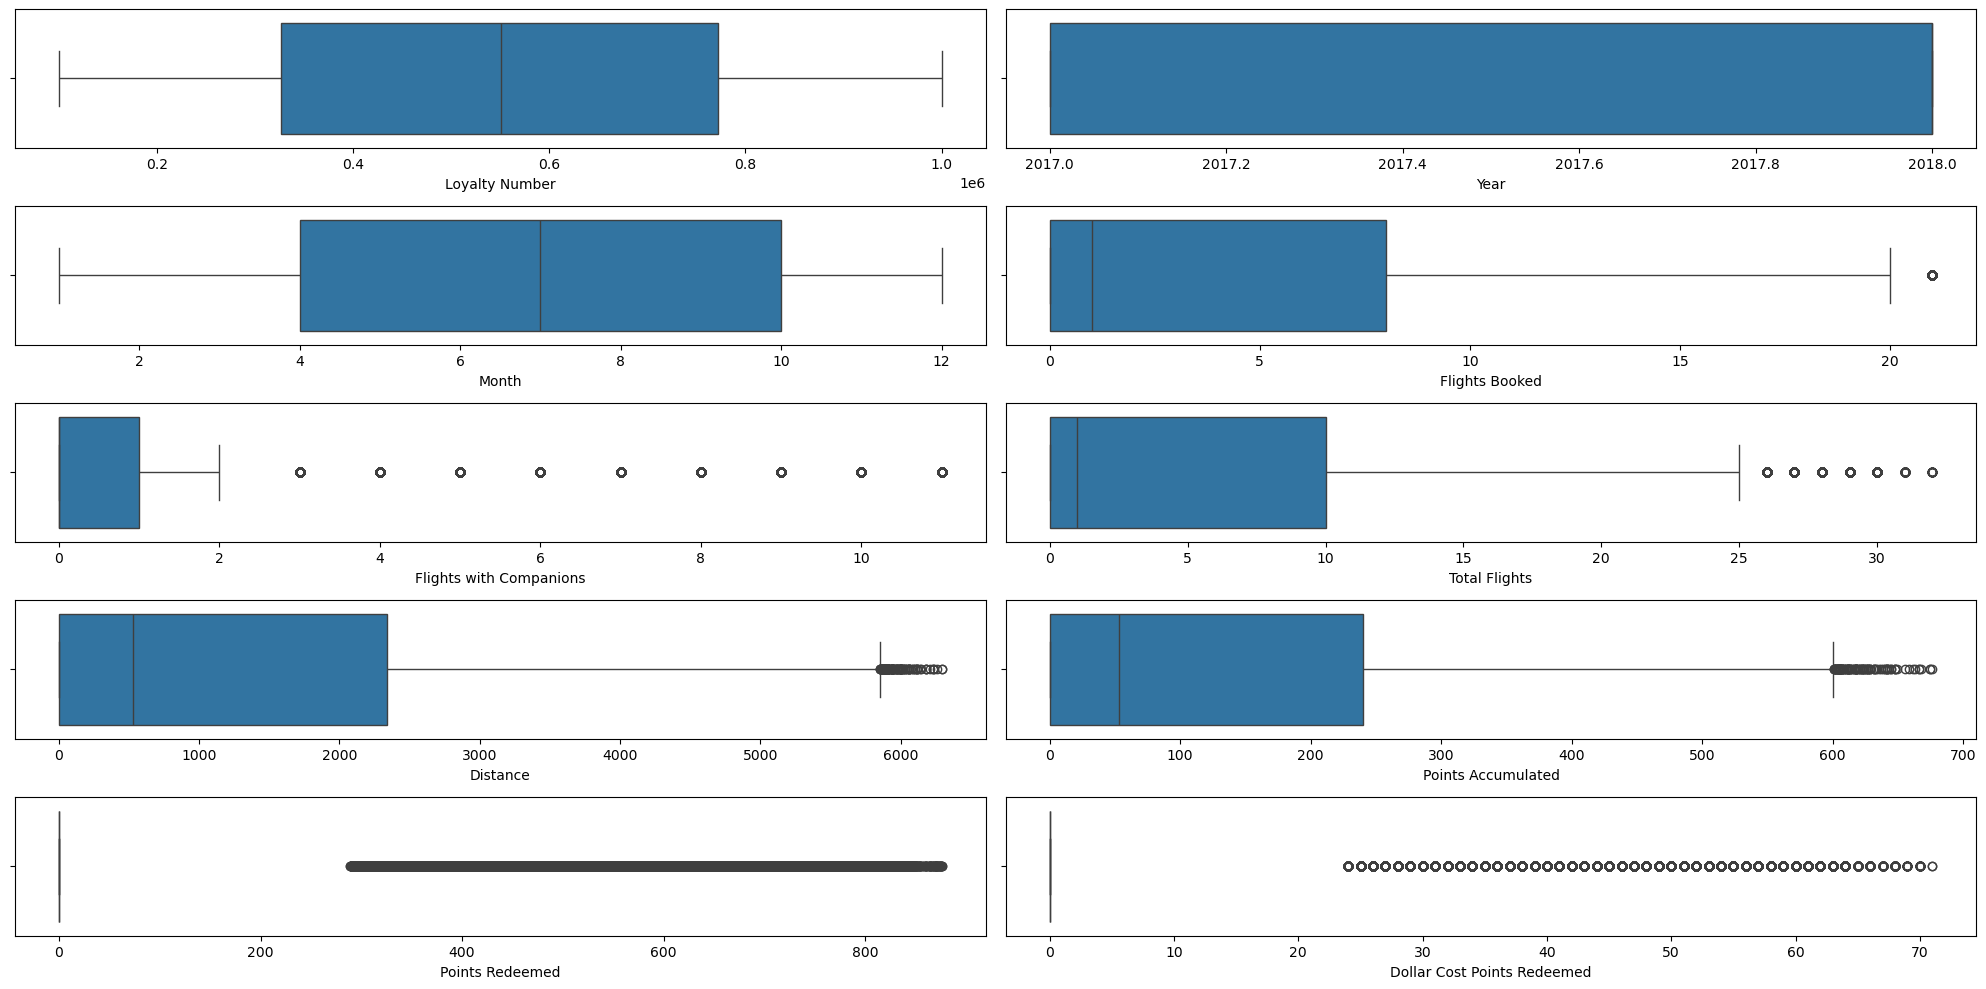

In [95]:
#Valores atipicos o outliers


fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(columnas_num):
    sns.boxplot(x = col, data =df_cust_flight1, ax = axes[indice])
    
plt.tight_layout();

*Análisis:*
- Tenemos una cantidad de datos atipicos en algunas de las categorías. Si bien esto no representa un problema significativo al no tener datos nulos. Es importante considerarlo en términos estadísticos y como puede estar influyendo en la media de algunas variables

- **Customer loyalty**

In [97]:
columnas_num= df_cust_loyal.select_dtypes(include = np.number).columns.tolist()
columnas_num

['Loyalty Number',
 'Salary',
 'CLV',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

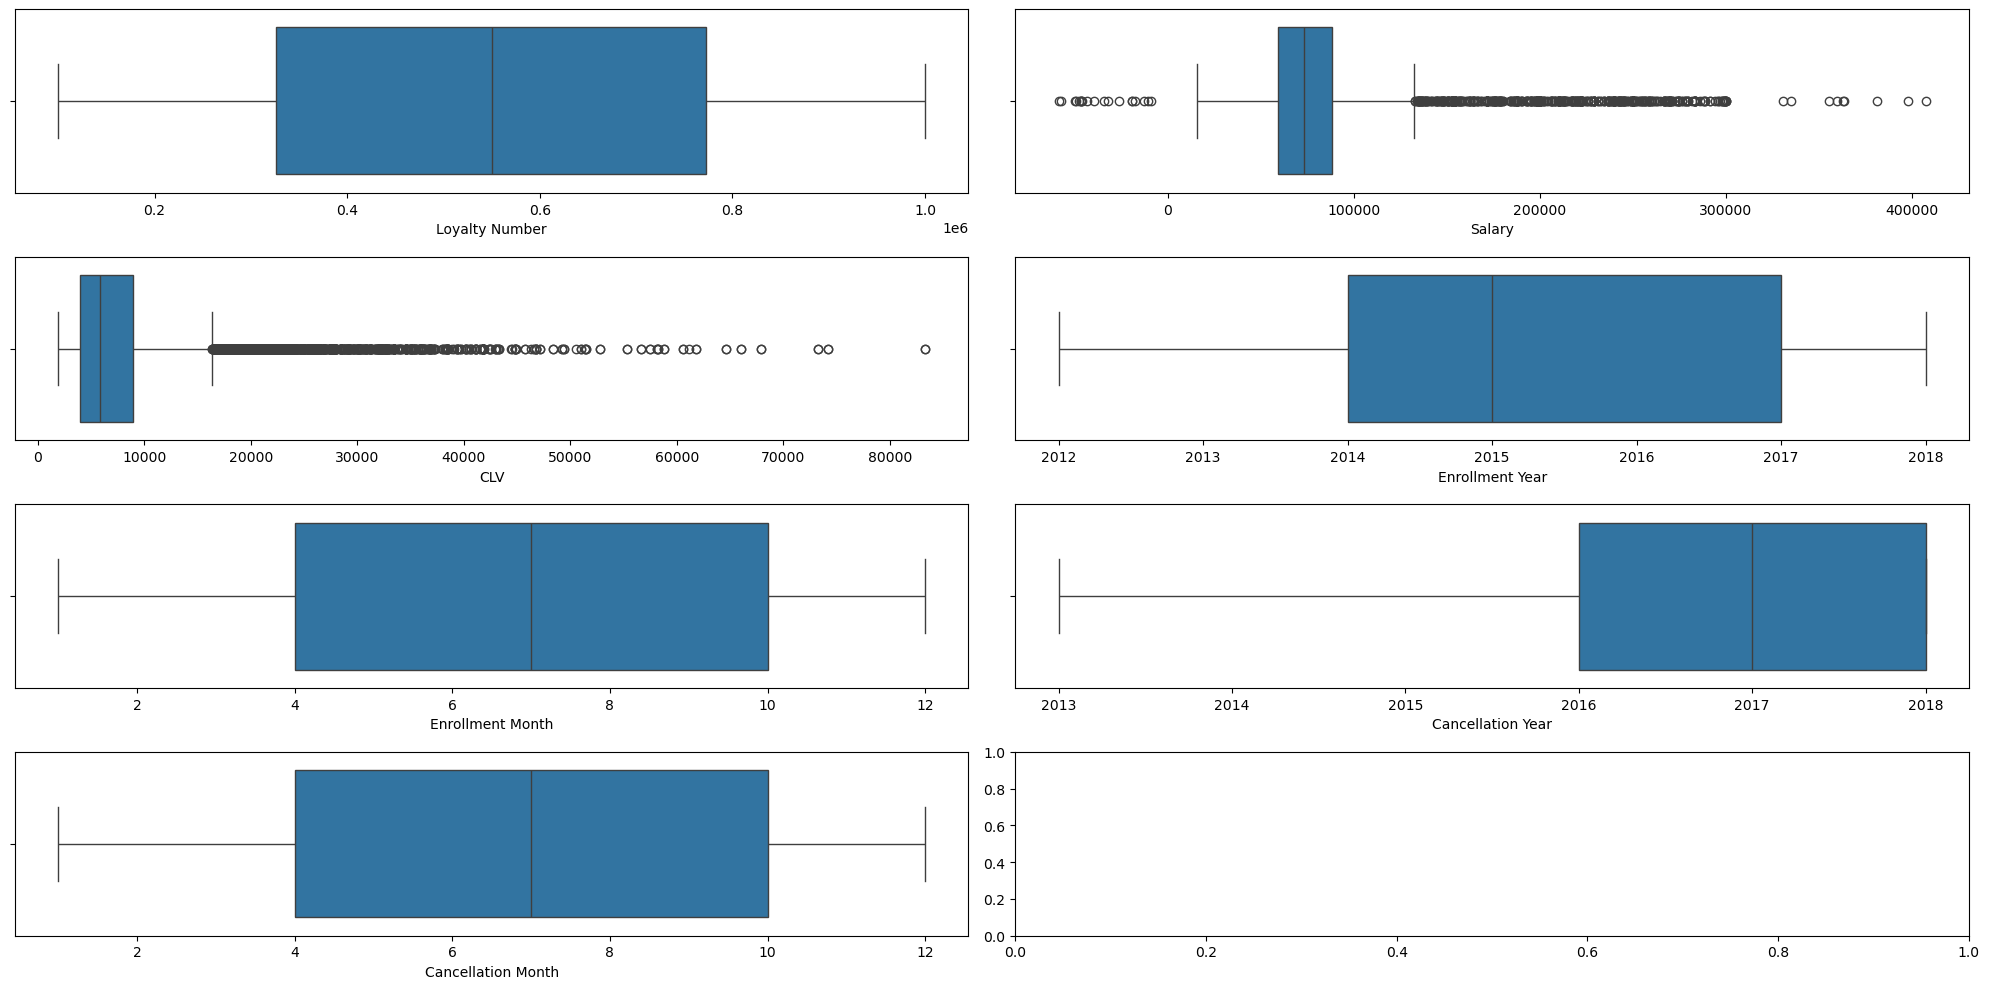

In [98]:
#Valores atipicos o outliers


fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(columnas_num):
    sns.boxplot(x = col, data =df_cust_loyal, ax = axes[indice])
    
plt.tight_layout();

`Unión DF`

In [106]:
df_cust_merg = df_cust_flight1.merge(df_cust_loyal, how='inner', on="Loyalty Number")

df_cust_merg

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


**Limpieza de datos**

1. Quitar espacios de las columnas y homogeneizar

In [107]:
df_cust_copy= df_cust_merg.copy()

In [108]:
# Homogeneizar nombres columnas
nuevas_columnas = {columna: columna.strip().lower().replace(" ", "_") for columna in df_cust_copy.columns}
df_cust_copy.rename(columns=nuevas_columnas, inplace=True)

# Verificar el cambio
print(df_cust_copy.columns)


Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')


In [109]:
df_cust_copy.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


2. En la columna salary tenemos algunos datos negativos


In [116]:
def sustituir_negativos(df, columna):
    df.loc[df[columna] < 0, columna] = df[columna].abs()  # selecciono solo las filas en las que el valor es negativo y lo convierto a positivo con .abs
    return df

sustituir_negativos(df_cust_copy, "salary")

# Comprobamos que ya no tiene negativos
df_cust_copy['salary'].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.])

3. Enrollment Type: 2018 Promotion, eliminar 2018

In [118]:
df_cust_copy["enrollment_type"].value_counts()

enrollment_type
Standard          380419
2018 Promotion     23341
Name: count, dtype: int64

In [120]:
def eliminar_num(df, columna): 
    df[columna] = df[columna].str.replace(r"\d+\s*", "", regex=True)

# Aplicamos  la función
eliminar_num(df_cust_copy, "enrollment_type")

# Verificar el cambio
df_cust_copy["enrollment_type"].unique()


array(['Standard', 'Promotion'], dtype=object)

4. Imputación de nulos

In [127]:
nulos=['salary', 'cancellation_year', 'cancellation_month']

df_nulos_numerico= pd.DataFrame((df_cust_copy[nulos].isnull().sum() / df_cust_copy[nulos].shape[0]) * 100, columns = ["%_nulos"])
df_nulos_numerico

,%_nulos
salary,25.326927
cancellation_year,87.703091
cancellation_month,87.703091


- **Salary**

<Axes: xlabel='salary'>

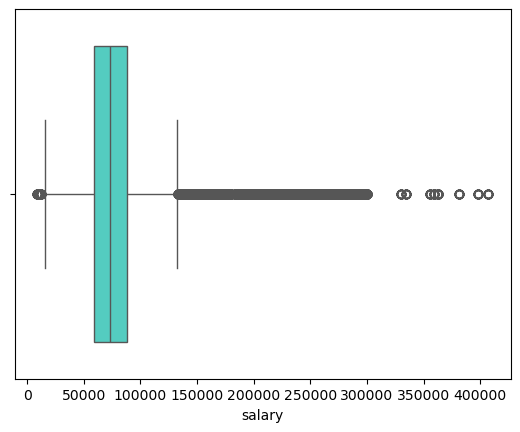

In [129]:

sns.boxplot(x="salary",
            data=df_cust_copy,
            width=0.8,
            color="turquoise")

In [132]:
#Tenemos demasiado outliers por lo que se gestionarán los nulos utilizando Iterative imputer

# Instanciar la clase de InterativeImputer
imputar_salary = IterativeImputer(max_iter = 20, random_state = 42)

# Ajustar y tranformar los datos
salary_limpio = imputar_salary.fit_transform(df_cust_copy[["salary"]])
salary_limpio

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

In [136]:
df_cust_copy["salary"] = salary_limpio.round(2)

In [138]:
# Comprobar los nulos. 
print(f"Después del 'IterativeImputer' tenemos {df_cust_copy["salary"].isnull().sum()} nulos")

Después del 'IterativeImputer' tenemos 0 nulos


Al entenderse que:

- Cancellation Year: Año en que el cliente canceló su membresía en el programa
de lealtad, si aplica.

- Cancellation  Month: Mes en que el cliente canceló su membresía en el programa
de lealtad, si aplica.

Se entiende que el 'si aplica' indica que aquellos que están como nulos es porque no han cancelado su membresía. Al tratarse de un porcentaje significativo casi el 87% de los datos. Se sugiere corroborar la suposición con el cliente y para el ejercicio práctico se eliminarán dichas columnas, ya que de momento no son relevantes para los análisis.

In [140]:
columnas_eliminar= ["cancellation_month","cancellation_year"]
df_cust_copy = df_cust_copy.drop(columnas_eliminar, axis=1)

In [142]:

df_cust_copy.sample(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
171365,274410,2017,11,3,0,3,897,89.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Male,Master,82940.00,Married,Star,2719.51,Standard,2017,9
148685,441345,2018,5,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Single,Nova,9402.73,Promotion,2018,3
121654,314705,2017,8,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,50723.00,Married,Nova,5319.84,Promotion,2018,4
57922,502784,2017,4,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,85038.00,Married,Nova,6521.37,Standard,2018,8
355121,201709,2018,10,8,0,8,1464,146.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,79371.73,Married,Aurora,7591.11,Standard,2013,11


In [143]:
df_cust_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  int64  
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

In [144]:
df_cust_copy.duplicated().sum()

0

In [145]:
df_cust_copy.to_csv('customer_limpio.csv', index= False)